<a href="https://colab.research.google.com/github/Srijani-Das07/Sentiment-Analysis/blob/main/Sentiment_Analysis_Logistic_Regression_and_SVM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn matplotlib seaborn


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import zipfile

# Unzip file
zip_path = "/content/drive/My Drive/Datasets/Dataset.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("data")


In [4]:
import os
print(os.listdir("data"))



['IMDB Dataset.csv']


In [5]:
# Loading CSV
df = pd.read_csv("data/IMDB Dataset.csv")
print(df.head())
print(df.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [8]:
# Cleaning the Dataset

import re

def clean_text(text):
    text = re.sub(r"<.*?>", " ", text)        # removing HTML tags
    text = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", text)  # keep letters/numbers/punctuation
    text = text.lower()
    text = re.sub(r"\s{2,}", " ", text)      # removing extra spaces
    return text.strip()

df['review_clean'] = df['review'].astype(str).apply(clean_text)
# Converting labels to 0/1
df['label'] = df['sentiment'].map(lambda x: 1 if str(x).lower() == 'positive' else 0)

X = df['review_clean'].values
y = df['label'].values


In [9]:
from sklearn.model_selection import train_test_split

# Train/Test split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (32000,)
Validation: (8000,)
Test: (10000,)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Enhanced TF-IDF: unigrams + bigrams + trigrams, sublinear term frequency
tfidf = TfidfVectorizer(
    ngram_range=(1,3),   # unigrams, bigrams, trigrams
    max_features=30000,  # limit vocabulary to top 30k
    sublinear_tf=True    # applying log(1+tf) weighting
)

# Fit on training set and transform
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)


In [11]:
# Logistic Regression MOdel
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=2000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
y_val_pred_lr = lr_model.predict(X_val_tfidf)


Logistic Regression Validation Metrics (Enhanced TF-IDF):
Accuracy: 0.9055
Precision: 0.8983
Recall: 0.9145
F1-score: 0.9063


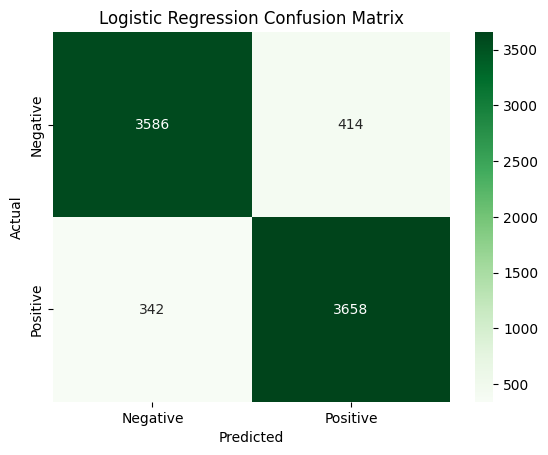

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

acc_lr = accuracy_score(y_val, y_val_pred_lr)
prec_lr = precision_score(y_val, y_val_pred_lr)
rec_lr = recall_score(y_val, y_val_pred_lr)
f1_lr = f1_score(y_val, y_val_pred_lr)

print("Logistic Regression Validation Metrics (Enhanced TF-IDF):")
print(f"Accuracy: {acc_lr:.4f}")
print(f"Precision: {prec_lr:.4f}")
print(f"Recall: {rec_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

cm_lr = confusion_matrix(y_val, y_val_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [13]:
# SVM Model
from sklearn.svm import LinearSVC

svm_model = LinearSVC(max_iter=5000, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
y_val_pred_svm = svm_model.predict(X_val_tfidf)


SVM Validation Metrics (Enhanced TF-IDF):
Accuracy: 0.9021
Precision: 0.8973
Recall: 0.9083
F1-score: 0.9027


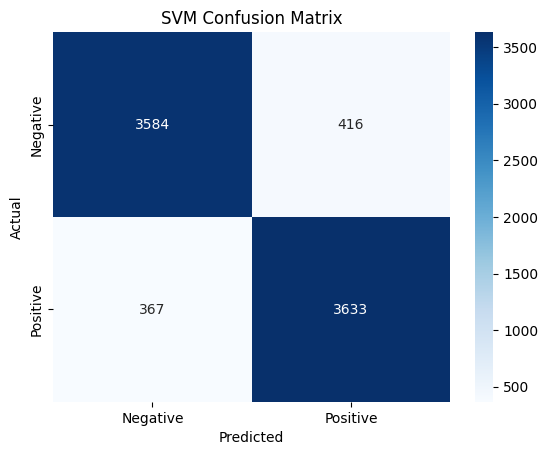

In [14]:

acc_svm = accuracy_score(y_val, y_val_pred_svm)
prec_svm = precision_score(y_val, y_val_pred_svm)
rec_svm = recall_score(y_val, y_val_pred_svm)
f1_svm = f1_score(y_val, y_val_pred_svm)

print("SVM Validation Metrics (Enhanced TF-IDF):")
print(f"Accuracy: {acc_svm:.4f}")
print(f"Precision: {prec_svm:.4f}")
print(f"Recall: {rec_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

cm = confusion_matrix(y_val, y_val_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


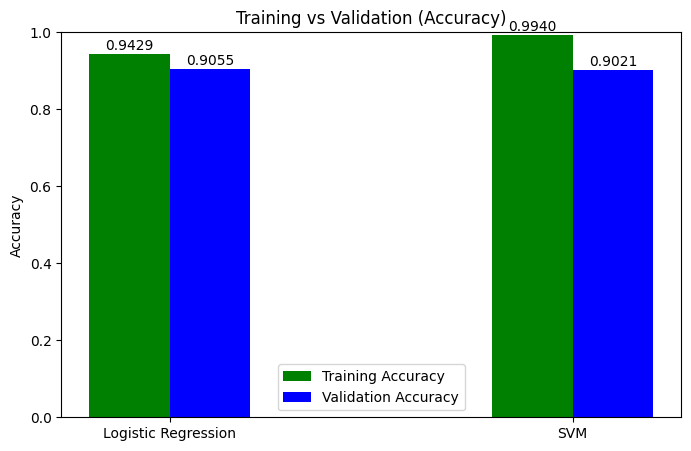

In [18]:
# Evaluation on Training Set
y_train_pred_lr = lr_model.predict(X_train_tfidf)
y_train_pred_svm = svm_model.predict(X_train_tfidf)

acc_train_lr = accuracy_score(y_train, y_train_pred_lr)
acc_val_lr = accuracy_score(y_val, y_val_pred_lr)

acc_train_svm = accuracy_score(y_train, y_train_pred_svm)
acc_val_svm = accuracy_score(y_val, y_val_pred_svm)

# Training vs Validation Plot (Based on Accuracy)
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'SVM']
train_acc = [acc_train_lr, acc_train_svm]
val_acc = [acc_val_lr, acc_val_svm]

x = np.arange(len(models))
width = 0.20

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, train_acc, width, label='Training Accuracy', color='green')
ax.bar(x + width/2, val_acc, width, label='Validation Accuracy', color='blue')

ax.set_ylabel('Accuracy')
ax.set_title('Training vs Validation (Accuracy)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0,1)
ax.legend()

for i in range(len(models)):
    ax.text(i - width/2, train_acc[i]+0.01, f"{train_acc[i]:.4f}", ha='center')
    ax.text(i + width/2, val_acc[i]+0.01, f"{val_acc[i]:.4f}", ha='center')

plt.show()


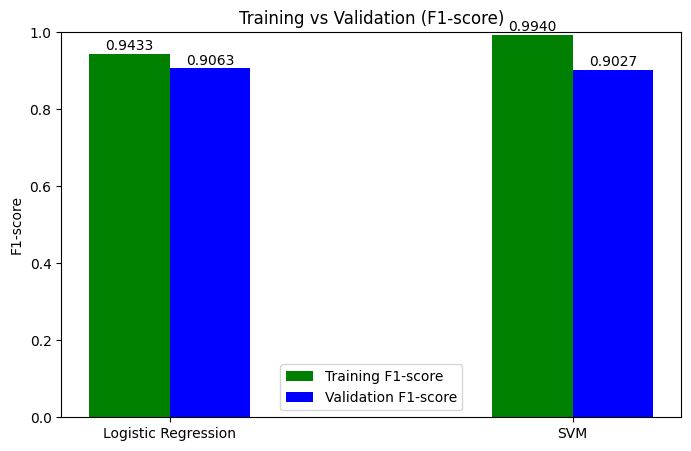

In [19]:
# Training vs Validation Plot (Based on F1 Score)

f1_train = [f1_score(y_train, y_train_pred_lr), f1_score(y_train, y_train_pred_svm)]
f1_val = [f1_lr, f1_svm]

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, f1_train, width, label='Training F1-score', color='green')
ax.bar(x + width/2, f1_val, width, label='Validation F1-score', color='blue')

ax.set_ylabel('F1-score')
ax.set_title('Training vs Validation (F1-score)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0,1)
ax.legend()

for i in range(len(models)):
    ax.text(i - width/2, f1_train[i]+0.01, f"{f1_train[i]:.4f}", ha='center')
    ax.text(i + width/2, f1_val[i]+0.01, f"{f1_val[i]:.4f}", ha='center')

plt.show()


In [ ]:
# Final Evaluation on Test Set

from sklearn.metrics import classification_report

# Logistic Regression Test
y_test_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Test Set Performance:")
print(classification_report(y_test, y_test_pred_lr, target_names=["Negative", "Positive"]))

# SVM Test
y_test_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Test Set Performance:")
print(classification_report(y_test, y_test_pred_svm, target_names=["Negative", "Positive"]))

# Confusion Matrices for Test
fig, axes = plt.subplots(1, 2, figsize=(12,5))

cm_lr_test = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm_lr_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'], ax=axes[0])
axes[0].set_title("Logistic Regression - Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

cm_svm_test = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(cm_svm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'], ax=axes[1])
axes[1].set_title("SVM - Test Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


Cell output screenshot in README.md

In [ ]:
# Comparison of metrics between Logistic Regression and SVM
import pandas as pd

results = pd.DataFrame([
    ["Logistic Regression", acc_lr, prec_lr, rec_lr, f1_lr],
    ["SVM", acc_svm, prec_svm, rec_svm, f1_svm]
], columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

print(results)

import matplotlib.pyplot as plt
import numpy as np

# Metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
models = results["Model"].values
values = results[metrics].values

# Plot
x = np.arange(len(metrics))  # label locations
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, values[0], width, label=models[0], color='green')
ax.bar(x + width/2, values[1], width, label=models[1], color='blue')

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics: Logistic Regression vs SVM')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)  # all metrics between 0 and 1
ax.legend()

# Show values on top of bars
for i in range(len(metrics)):
    ax.text(i - width/2, values[0][i] + 0.01, f"{values[0][i]:.4f}", ha='center')
    ax.text(i + width/2, values[1][i] + 0.01, f"{values[1][i]:.4f}", ha='center')

plt.show()


Cell output screenshot in README.md

In [22]:
# Comparison Summary

results_full = pd.DataFrame([
    ["Logistic Regression (Val)", acc_lr, prec_lr, rec_lr, f1_lr],
    ["SVM (Val)", acc_svm, prec_svm, rec_svm, f1_svm],
    ["Logistic Regression (Test)",
     accuracy_score(y_test, y_test_pred_lr),
     precision_score(y_test, y_test_pred_lr),
     recall_score(y_test, y_test_pred_lr),
     f1_score(y_test, y_test_pred_lr)],
    ["SVM (Test)",
     accuracy_score(y_test, y_test_pred_svm),
     precision_score(y_test, y_test_pred_svm),
     recall_score(y_test, y_test_pred_svm),
     f1_score(y_test, y_test_pred_svm)]
], columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

print(results_full)


                        Model  Accuracy  Precision   Recall  F1-score
0   Logistic Regression (Val)  0.905500   0.898330  0.91450  0.906343
1                   SVM (Val)  0.902125   0.897259  0.90825  0.902721
2  Logistic Regression (Test)  0.906900   0.902155  0.91280  0.907446
3                  SVM (Test)  0.910100   0.910182  0.91000  0.910091
